<a href="https://colab.research.google.com/github/Satya03012002/DSA-Bootcamp-Java/blob/main/Copy_of_face_recognition_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imutils
import numpy as np
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
!unzip -qq haar-face-detection.zip
%cd haar-face-detection

--2022-12-06 08:03:30--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.184.89, 52.218.177.89, 52.92.178.82, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.184.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2184692 (2.1M) [application/zip]
Saving to: ‘haar-face-detection.zip’

haar-face-detection 100%[===================>]   2.08M  2.16MB/s    in 1.0s    

2022-12-06 08:03:31 (2.16 MB/s) - ‘haar-face-detection.zip’ saved [2184692/2184692]

/content/haar-face-detection


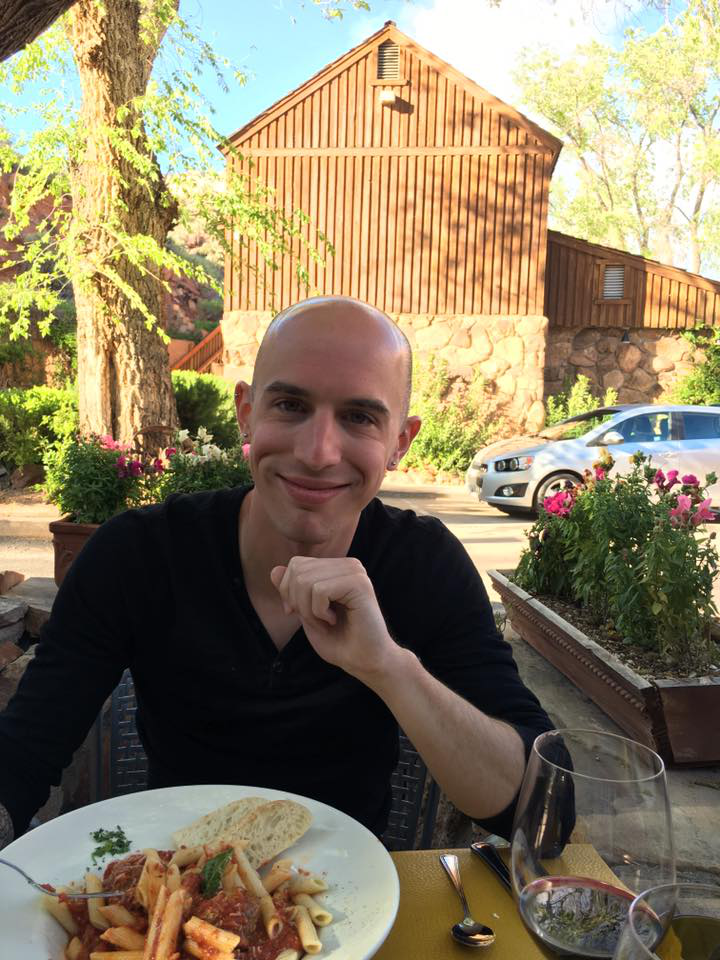

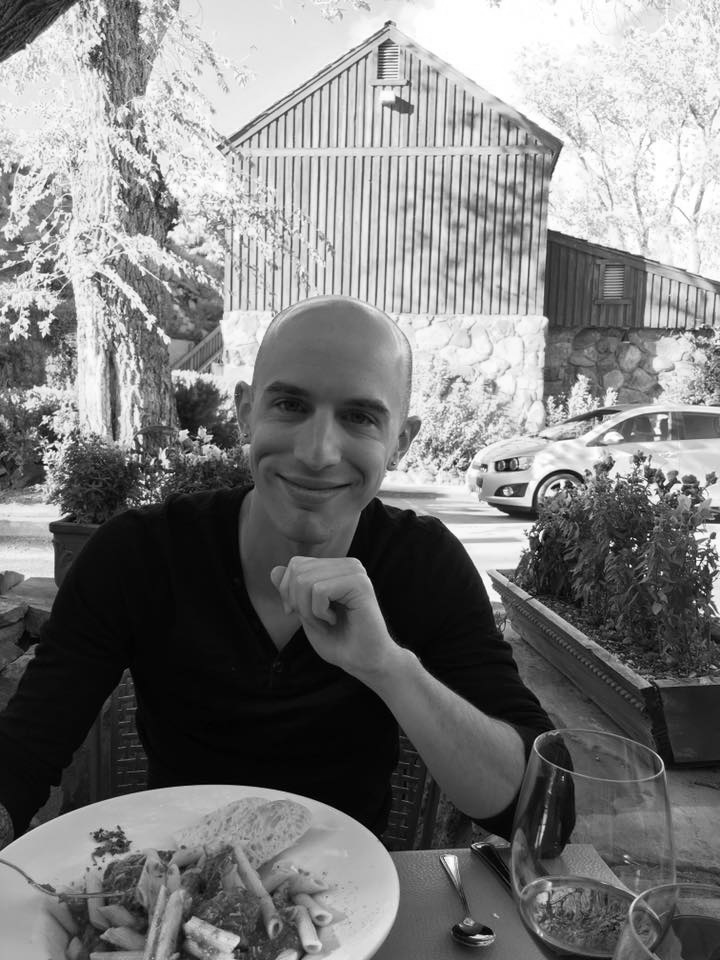

[[224 235 238 ... 236 234 241]
 [244 241 241 ... 241 228 232]
 [242 244 244 ... 237 235 236]
 ...
 [  9   8   7 ...  14  16  17]
 [  9   8   7 ...  15  16  16]
 [  9   8   7 ...  15  15  15]]
[[  9   9   9 ...  49  51  50]
 [ 14  15  16 ...  48  49  49]
 [ 14  15  15 ...  48  49  49]
 ...
 [ 37  53  68 ... 103 104 105]
 [ 46  72  88 ... 102 102 103]
 [ 61  90 101 ...  99  99  98]]


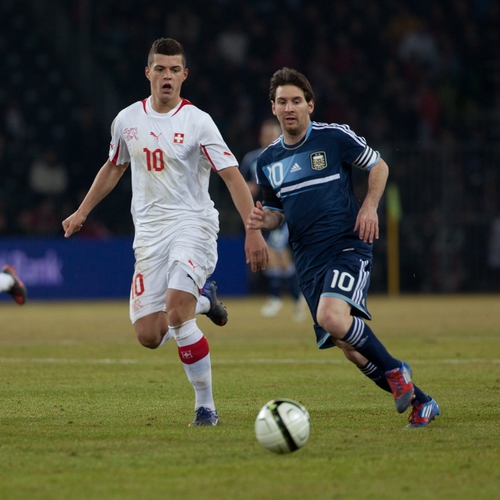

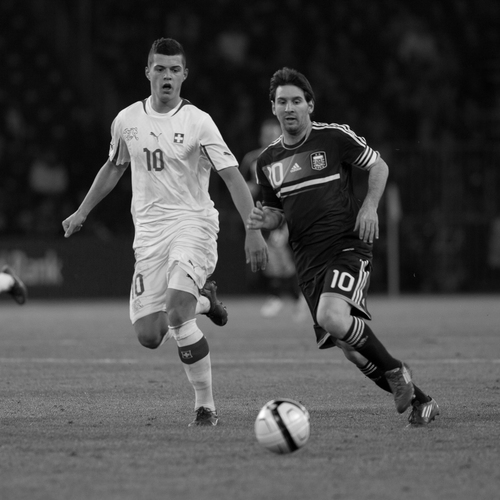

[[14 13 14 ... 15 16 16]
 [13 13 13 ... 15 16 15]
 [12 12 10 ... 18 17 17]
 ...
 [15 15 15 ... 14 17 17]
 [15 17 18 ... 17 15 17]
 [16 15 10 ... 18 16 17]]
[[ 20  19  18 ...  17  15  15]
 [ 18  19  20 ...  16  17  17]
 [ 19  19  20 ...  21  16  17]
 ...
 [ 84  93  99 ... 130 122  99]
 [ 89  97 101 ... 133  91  17]
 [ 92  99 103 ... 121  57  19]]


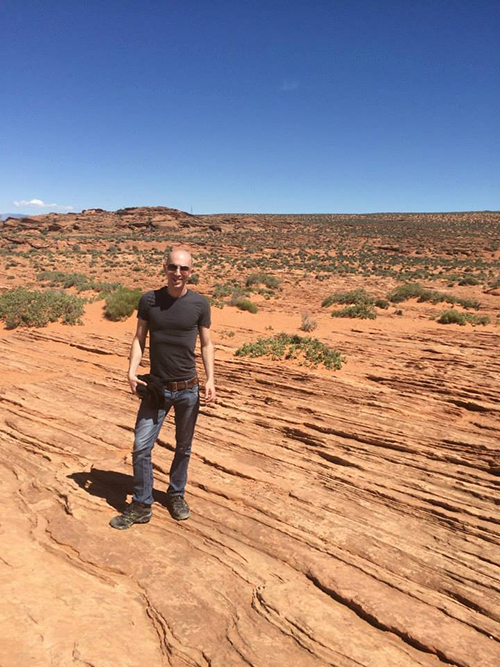

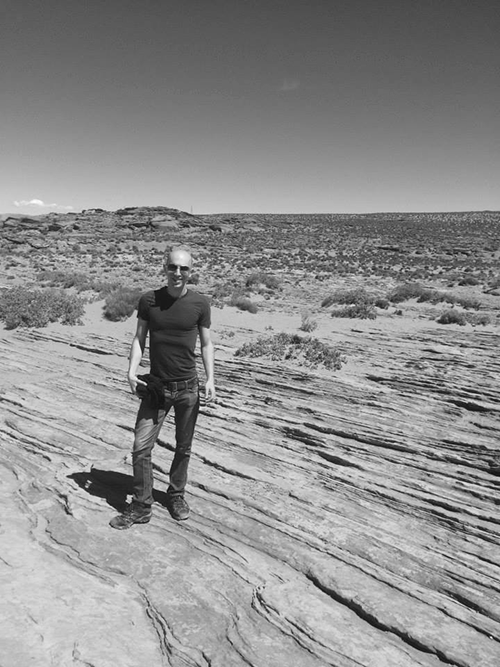

[[148  96 111 ... 101 113 127]
 [101  97 142 ... 135  99  95]
 [ 96 104 125 ... 181 160  94]
 ...
 [156 139 119 ... 189 186 199]
 [132  86  26 ... 169 170 181]
 [ 31  33  20 ... 156 165 174]]


In [ ]:
people = ['images']
DIR = r'/content/haar-face-detection/'
features = []
labels = []

def create_train():
  for person in people:
    path = os.path.join(DIR, person)
    label = people.index(person)

    for img in os.listdir(path):
      # cv2_imshow(img)
      img_path = os.path.join(path,img)
      img_array = cv2.imread(img_path)
      cv2_imshow(img_array)
      gray = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
      cv2_imshow(gray)
      face_cascade = cv2.CascadeClassifier('/content/haar-face-detection/haarcascade_frontalface_default.xml')
      faces_rect = face_cascade.detectMultiScale(gray, 1.1, 3)
      for(x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h, x:x+w] # crop out the image of our interest roi - region og interest
        print(faces_roi)
        features.append(faces_roi)
        labels.append(label) # here is label is basically index of image in the folder

create_train()

In [ ]:
features = np.array(features, dtype = 'object') # coverting features into numpy array
labels = np.array(labels)# coverting labelsinto numpy array
haar_cascade = cv2.CascadeClassifier('/content/haar-face-detection/haarcascade_frontalface_default.xml')
face_recognizer = cv2.face.LBPHFaceRecognizer_create() #Face-Recognition algorithm it is used to recognize the face of a person.

face_recognizer.train(features,labels)
# print(face_recognizer.predict(faces_roi))
face_recognizer.save('face_traines.yml') # saving the training set

In [ ]:
np.save('features.npy',features) # save features in features.npy
np.save('labels.npy',labels)

In [ ]:
features = np.load('features.npy', allow_pickle=True)
labels = np.load('labels.npy')

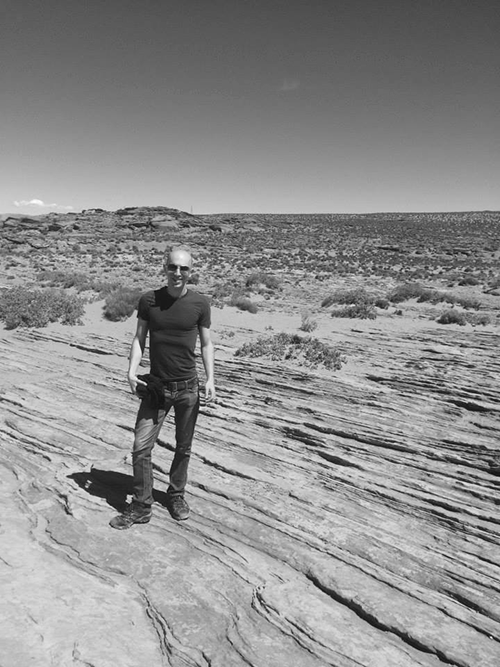

[[163 256  32  32]]


In [ ]:
img = cv2.imread('/content/haar-face-detection/images/adrian_02.png')


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 3)
print(faces_rect)

In [ ]:
for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]
    # print(faces_roi)

    label,confidence = face_recognizer.predict(faces_roi)
    # print(label)
    # print(confidence)
    # print(f'Label = {people[label]} with a confidence of {confidence}')

    cv2.putText(img, str("match"), (20,20), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

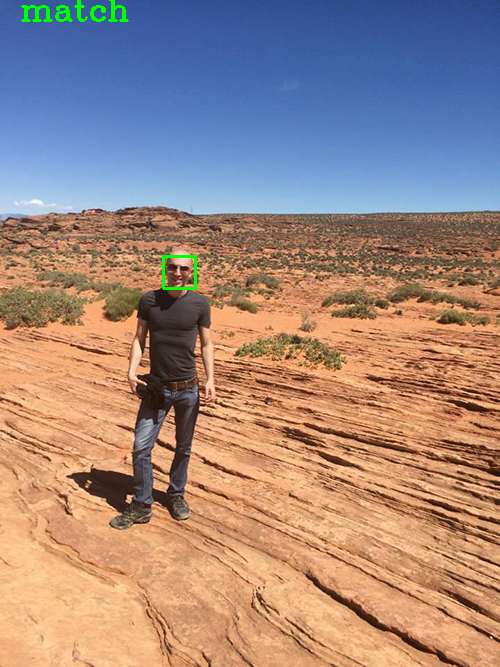

In [ ]:
cv2_imshow(img)